In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset("titanic")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
deaths = 0
survived = 0
mean = df["survived"].sum()/len(df["survived"])
df["survived"].fillna(mean, inplace=True)



In [16]:
for i in df["survived"]:
    if i ==1:
        survived+=1
    else:
        deaths+=1

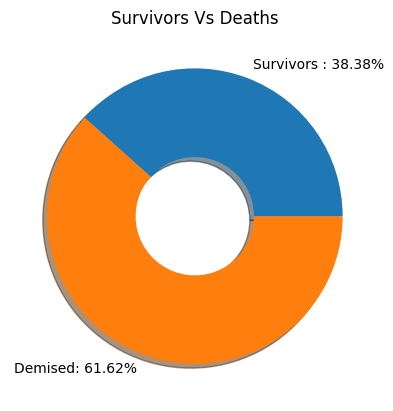

In [42]:
data = [survived, deaths]

s_per = round((survived/891) *100, 2)
d_per = round((deaths/891) *100,2)
Labels = [f"Survivors : {s_per}%", f"Demised: {d_per}%"]
plt.pie(data, labels=Labels, shadow=1, wedgeprops={'width' : 0.6})
plt.title("Survivors Vs Deaths")
plt.show()

In [52]:
male = 0
female = 0
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
for i in df['sex']:
    if i == 'male':
        male+=1
    elif i == "female":
        female+=1
data = [male, female]
print(male, female)

577 314


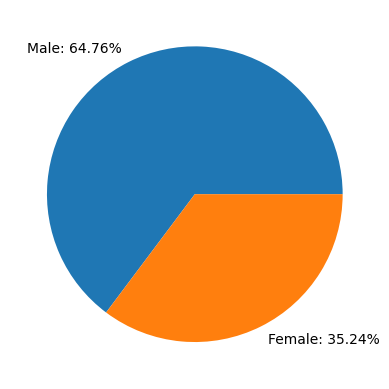

In [53]:
Label = [f'Male: {round((male/891)*100,2)}%', f'Female: {round((female/891)*100,2)}%']
data = plt.pie(data, labels=Label)

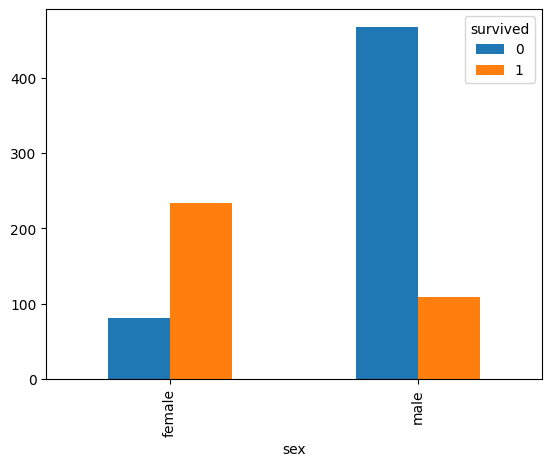

In [58]:
survivor = df.groupby(["sex", 'survived']).size().unstack()
survivor.plot(kind='bar')   
plt.show()

In [61]:
df["pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

<Axes: xlabel='pclass,sex'>

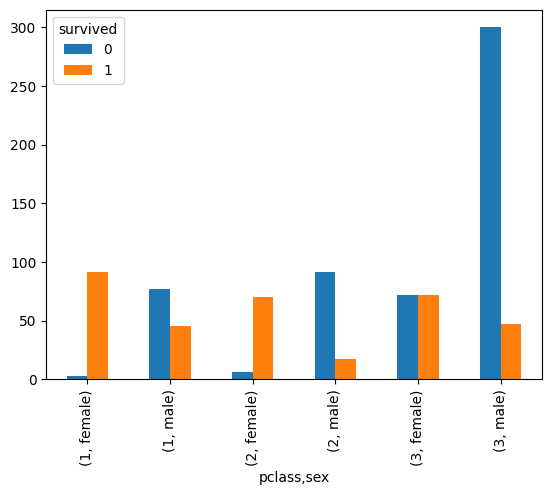

In [64]:
survival = df.groupby(["pclass", "sex", "survived"]).size().unstack()
survival.plot(kind = "bar")

In [65]:
## After looking this bar plot and above pie charts, we may conclude that 
# due to the female and children first policy, the survival rates of men were low.

In [66]:
df['age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [68]:
df.age.fillna(df.age.mean(), inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x20870562270>,
 'caps': [<matplotlib.lines.Line2D at 0x2087546c380>,
 'boxes': [<matplotlib.lines.Line2D at 0x20870071580>],
 'medians': [<matplotlib.lines.Line2D at 0x2087546c950>],
 'fliers': [<matplotlib.lines.Line2D at 0x2087546cbc0>],
 'means': []}

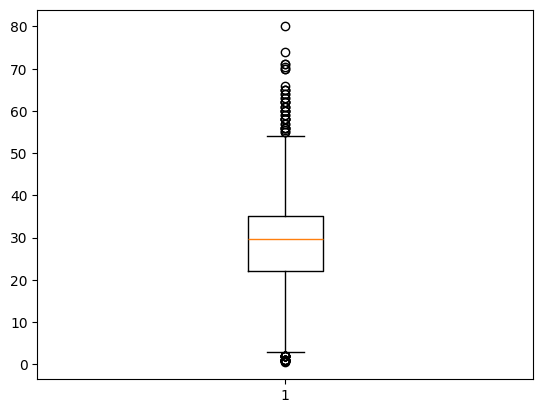

In [69]:
plt.boxplot(df.age)

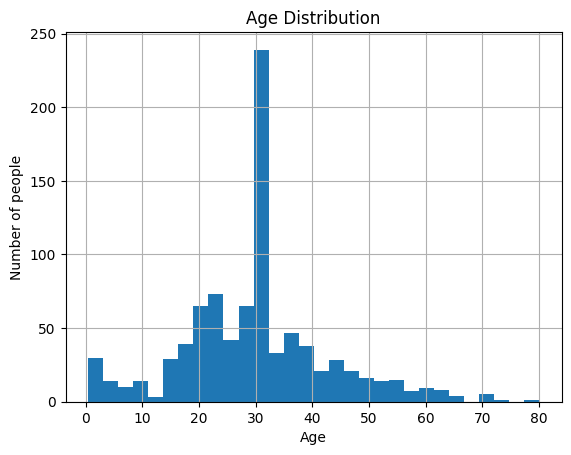

In [73]:
plt.hist(df.age, bins = 30)
plt.grid()
plt.title('Age Distribution')
plt.ylabel("Number of people")
plt.xlabel("Age")
plt.show()